# Машинное обучение, ВМК МГУ

## Практическое задание 7. Градиентный бустинг ~~своими руками~~

### Общая информация
Дата выдачи: 05.03.2019

Мягкий дедлайн: 23:59MSK 14.03.2019

Жесткий дедлайн: 23:59MSK 17.03.2019

**Выполнил: Попов Дмитрий**, группа 317

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd

In [2]:
df = pd.read_csv("application_train.csv")

In [3]:
print(df.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [4]:
with pd.option_context('display.max_rows', 12, 'display.max_columns', None):
    print(df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cas

In [5]:
y = df['TARGET']
df.drop(columns=['TARGET', 'SK_ID_CURR'], inplace=True)

In [6]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [7]:
for col in df.dtypes.index[df.dtypes != float]:
    df[col] = df[col].fillna(df[col].value_counts().idxmax())

In [8]:
for col in df.dtypes.index[df.dtypes == float]:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
from sklearn.preprocessing import LabelEncoder
for col in df.dtypes.index[df.dtypes == object]:
    df[col] = LabelEncoder().fit_transform(df[col])

In [10]:
df.dtypes.unique()

array([dtype('int32'), dtype('int64'), dtype('float64')], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [13]:
num_features = list(df.dtypes.index[df.dtypes != 'int32'])
cat_features = list(df.dtypes.index[df.dtypes == 'int32'])

In [14]:
len(num_features), len(cat_features)

(104, 16)

In [15]:
cb2 = CatBoostClassifier(verbose=100)

In [16]:
%%time
cb2.fit(X_train[num_features], y_train)

Learning rate set to 0.076622
0:	learn: 0.6161856	total: 229ms	remaining: 3m 49s
100:	learn: 0.2490795	total: 9.59s	remaining: 1m 25s
200:	learn: 0.2458302	total: 18.2s	remaining: 1m 12s
300:	learn: 0.2430789	total: 27.2s	remaining: 1m 3s
400:	learn: 0.2408876	total: 36.3s	remaining: 54.2s
500:	learn: 0.2388415	total: 45.7s	remaining: 45.5s
600:	learn: 0.2368517	total: 54.9s	remaining: 36.4s
700:	learn: 0.2349460	total: 1m 4s	remaining: 27.3s
800:	learn: 0.2330659	total: 1m 13s	remaining: 18.2s
900:	learn: 0.2312854	total: 1m 22s	remaining: 9.07s
999:	learn: 0.2295513	total: 1m 31s	remaining: 0us
Wall time: 1min 35s


In [17]:
lgbm2 = LGBMClassifier()

In [18]:
%%time
lgbm2.fit(X_train[num_features], y_train)

Wall time: 5.78 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
from sklearn.metrics import average_precision_score

In [20]:
print('CatBoost: {:.3f}'.format(average_precision_score(y_test, cb2.predict_proba(X_test[num_features])[:, 1])))
print('LGBM: {:.3f}'.format(average_precision_score(y_test, lgbm2.predict_proba(X_test[num_features])[:, 1])))

CatBoost: 0.233
LGBM: 0.230


**Ответ:** Ну, вообще-то, разница незаметная даже в масштабах сравниваемых значений. Объясняется в любом случае разной логикой моделей и разными параметрами.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

**Ответ:** Я попробовал перебирать одновременно количество деревьев и темп обучения, но это работало неприлично долго, поэтому всюду в работе я фиксирую количество деревьев. В любом случае, обычно искать надо не сами значения количества деревьев и темпа обучения, а их произведение, поэтому вполне можно зафиксировать один из параметров.

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [33]:
%%time
rs_cb3 = RandomizedSearchCV(CatBoostClassifier(n_estimators=100, verbose=0), {
    'max_depth': range(4, 12),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=-1)
rs_cb3.fit(X_train[num_features], y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 out of  18 | elapsed:  1.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  1.5min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   6 out of  18 | elapsed:  1.6min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  1.6min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:  1.6min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  2.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed:  2.8min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  2.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  1

In [34]:
%%time
rs_lgbm3 = RandomizedSearchCV(LGBMClassifier(n_estimators=100, verbose=0), {
    'max_depth': range(4, 12),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=-1)
rs_lgbm3.fit(X_train[num_features], y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done   4 out of  18 | elapsed:   28.6s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   28.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   6 out of  18 | elapsed:   32.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   32.6s remaining:   51.2s
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:   33.1s remaining:   41.3s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   54.3s remaining:   54.3s
[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed:   56.3s remaining:   45.1s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   57.6s remaining:   36.6s
[Parallel(n_jobs=-1)]: Done  1

In [35]:
print('CatBoost: {:.3f}'.format(average_precision_score(y_test, rs_cb3.predict_proba(X_test[num_features])[:, 1])))
print('LGBM: {:.3f}'.format(average_precision_score(y_test, rs_lgbm3.predict_proba(X_test[num_features])[:, 1])))

CatBoost: 0.224
LGBM: 0.232


In [36]:
print(rs_cb3.best_params_)
print(rs_lgbm3.best_params_)

{'learning_rate': 0.09298021204559256, 'max_depth': 7}
{'learning_rate': 0.09298021204559256, 'max_depth': 7}


**Ответ:** Произведение темпа обучения и количества деревьев совпали у двух алгоритмов.

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe_transform = ColumnTransformer([
    (col, OneHotEncoder(categories='auto'), [col]) for col in cat_features
], remainder='passthrough')

ohe_X_train = ohe_transform.fit_transform(X_train)
ohe_X_test = ohe_transform.transform(X_test)

In [24]:
print(ohe_X_train.shape)
print(X_train.shape)

(215257, 244)
(215257, 120)


In [25]:
%%time
rs_cb4_ohe = RandomizedSearchCV(CatBoostClassifier(n_estimators=100, verbose=0), {
    'max_depth': range(6, 10),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=4)
rs_cb4_ohe.fit(ohe_X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:  3.6min remaining:  1.8min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  4.5min remaining:  1.7min
[Parallel(n_jobs=4)]: Done  14 out

In [26]:
%%time
rs_lgbm4_ohe = RandomizedSearchCV(LGBMClassifier(n_estimators=100, verbose=0), {
    'max_depth': range(6, 10),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=4)
rs_lgbm4_ohe.fit(ohe_X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   22.8s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   41.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   41.7s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   44.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   44.2s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:  1.1min remaining:   32.4s
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  1.4min remaining:   31.7s
[Parallel(n_jobs=4)]: Done  14 out

In [27]:
from sklearn.base import TransformerMixin, BaseEstimator

class CounterEncoder(TransformerMixin, BaseEstimator):
    def fit(self, X, y):
        self.map = {name: y[group[group.columns[0]]].mean() for (name, group) in X.groupby(X.columns[0])}
        return self
    
    def transform(self, X):
        for name, group in X.groupby(X.columns[0]):
            X[group.columns[0]] = self.map[name]
        return X
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [28]:
counter_transformer = ColumnTransformer([(col, CounterEncoder(), cat_features)], remainder='passthrough')

counter_X_train = counter_transformer.fit_transform(X_train, y_train)
counter_X_test = counter_transformer.transform(X_test)

In [29]:
%%time
rs_cb4_cnt = RandomizedSearchCV(CatBoostClassifier(n_estimators=100, verbose=0), {
    'max_depth': range(6, 10),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=4)
rs_cb4_cnt.fit(counter_X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   47.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   47.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   47.6s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   50.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:  2.5min remaining:  1.2min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  3.2min remaining:  1.2min
[Parallel(n_jobs=4)]: Done  14 out

In [30]:
%%time
rs_lgbm4_cnt = RandomizedSearchCV(LGBMClassifier(n_estimators=100, verbose=0), {
    'max_depth': range(6, 10),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=4)
rs_lgbm4_cnt.fit(counter_X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   19.5s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   35.7s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   56.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   58.0s
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:   58.2s remaining:   29.1s
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  1.2min remaining:   28.7s
[Parallel(n_jobs=4)]: Done  14 out

In [31]:
%%time
rs_cb4_def = RandomizedSearchCV(CatBoostClassifier(n_estimators=100, cat_features=cat_features, verbose=0), {
    'max_depth': range(6, 10),
    'learning_rate': stats.expon(scale=0.05)
}, cv=3, n_iter=6, random_state=0, scoring='average_precision', verbose=50, n_jobs=4)
rs_cb4_def.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:  7.6min remaining:  3.8min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  8.9min remaining:  3.4min
[Parallel(n_jobs=4)]: Done  14 out

In [37]:
print('CatBoost on numerical: {:.3f}'.format(average_precision_score(y_test, rs_cb3.predict_proba(X_test[num_features])[:, 1])))
print('CatBoost OHE: {:.3f}'.format(average_precision_score(y_test, rs_cb4_ohe.predict_proba(ohe_X_test)[:, 1])))
print('CatBoost counters: {:.3f}'.format(average_precision_score(y_test, rs_cb4_cnt.predict_proba(counter_X_test)[:, 1])))
print('CatBoost default: {:.3f}'.format(average_precision_score(y_test, rs_cb4_def.predict_proba(X_test)[:, 1])))

CatBoost on numerical: 0.224
CatBoost OHE: 0.233
CatBoost counters: 0.230
CatBoost default: 0.232


In [38]:
print('LGBM on numerical: {:.3f}'.format(average_precision_score(y_test, rs_lgbm3.predict_proba(X_test[num_features])[:, 1])))
print('LGBM OHE: {:.3f}'.format(average_precision_score(y_test, rs_lgbm4_ohe.predict_proba(ohe_X_test)[:, 1])))
print('LGBM counters: {:.3f}'.format(average_precision_score(y_test, rs_lgbm4_cnt.predict_proba(counter_X_test)[:, 1])))

LGBM on numerical: 0.232
LGBM OHE: 0.235
LGBM counters: 0.235


**Ответ:** CatBoost лучше всего справился с One-Hot закодированными данными, вторым и близким к нему вариантом является использование стандартного для него способа обработки категориальных признаков. LightGBM победил в каждом отдельно взятом поединке, с равным результатом для счётчиков и One-Hot кодирования.

__Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [39]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Blend model: {:.3f}'.format(average_precision_score(y_test, 
                                                           (rs_cb3.predict_proba(X_test[num_features])[:, 1] + 
                                                           rs_cb4_ohe.predict_proba(ohe_X_test)[:, 1] + 
                                                           rs_cb4_cnt.predict_proba(counter_X_test)[:, 1] + 
                                                           rs_cb4_def.predict_proba(X_test)[:, 1] + 
                                                           rs_lgbm3.predict_proba(X_test[num_features])[:, 1] +
                                                           rs_lgbm4_ohe.predict_proba(ohe_X_test)[:, 1] +
                                                           rs_lgbm4_cnt.predict_proba(counter_X_test)[:, 1])/7
                                                          )))

Blend model: 0.236


**Ответ:** Я собирался сравнить со средним качеством всех моделей, но получилось так, что блендинг побеждает абсолютно каждую изначальную модель... Интересно, ведь это даже без настройки весов, а просто среднее. Я попытался настроить веса получше после выполнения всей работы, но два классификатора уже испорчены последним заданием.

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [42]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt

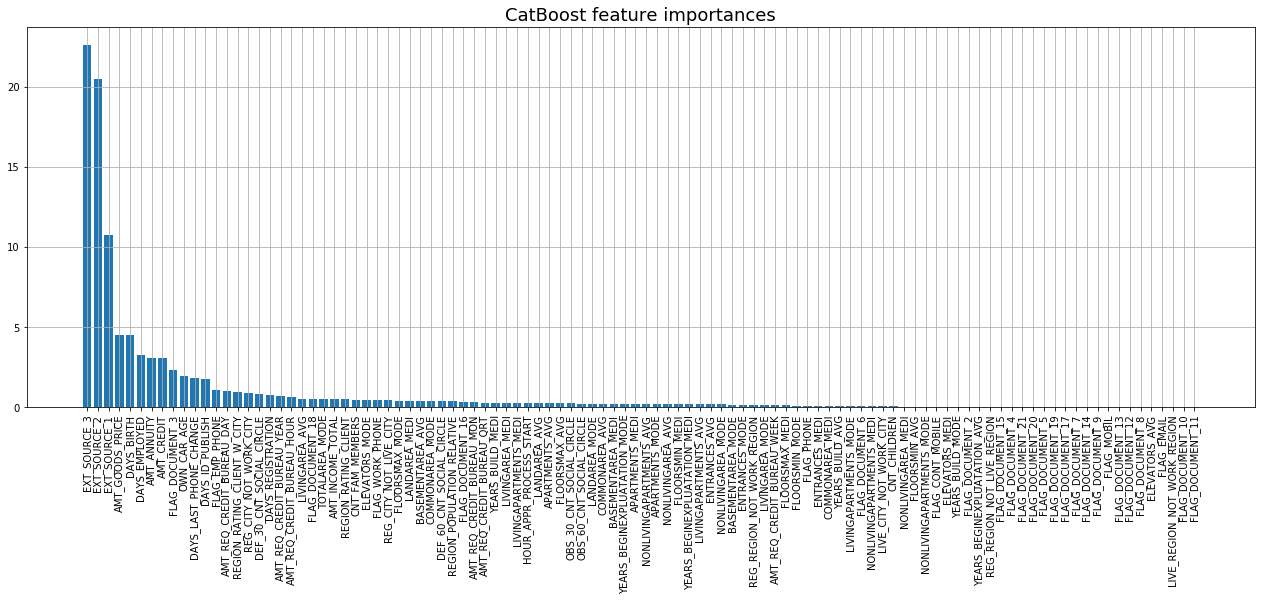

In [53]:
cb_feature_importances = np.argsort(rs_cb3.best_estimator_.feature_importances_)[::-1]
plt.figure(figsize=(22, 7))
plt.title('CatBoost feature importances', fontsize=18)
plt.bar(np.arange(len(num_features)), rs_cb3.best_estimator_.feature_importances_[cb_feature_importances])
plt.xticks(np.arange(len(num_features)), np.array(num_features)[cb_feature_importances], rotation=90)
plt.grid()
plt.show()

In [57]:
rs_cb3.best_estimator_.feature_importances_[cb_feature_importances][12]

1.0642113174266454

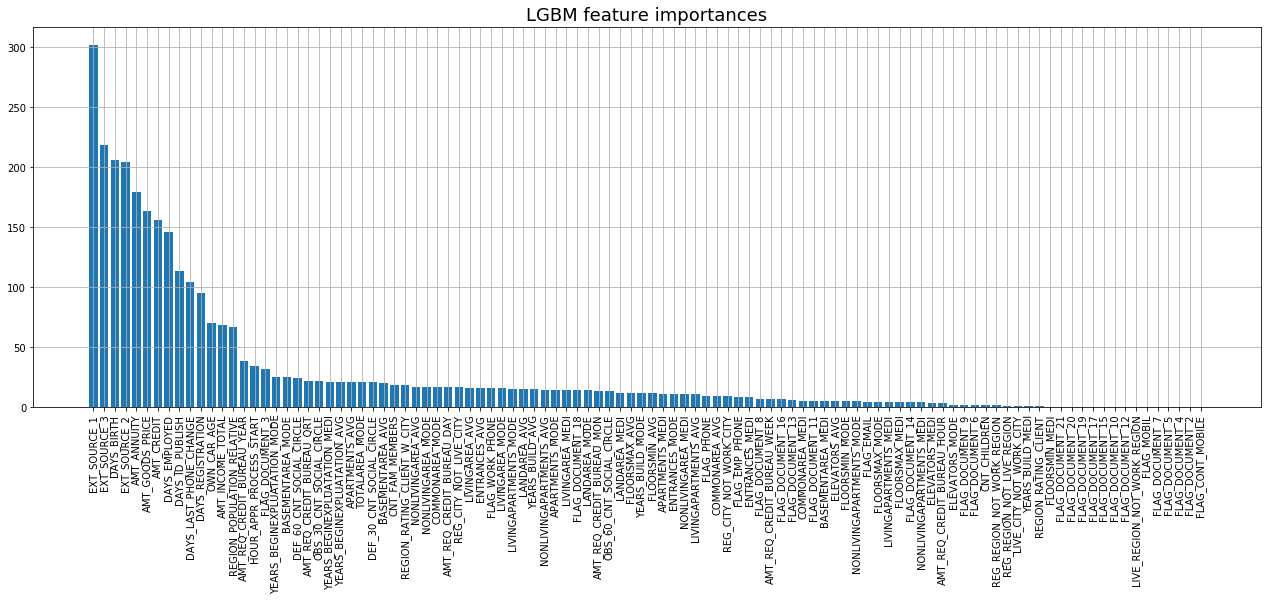

In [58]:
lgbm_feature_importances = np.argsort(rs_lgbm3.best_estimator_.feature_importances_)[::-1]
plt.figure(figsize=(22, 7))
plt.title('LGBM feature importances', fontsize=18)
plt.bar(np.arange(len(num_features)), rs_lgbm3.best_estimator_.feature_importances_[lgbm_feature_importances])
plt.xticks(np.arange(len(num_features)), np.array(num_features)[lgbm_feature_importances], rotation=90)
plt.grid()
plt.show()

In [59]:
rs_lgbm3.best_estimator_.feature_importances_[lgbm_feature_importances][18]

25

In [61]:
cb_imp_features = np.array(num_features)[rs_cb3.best_estimator_.feature_importances_ > 1.065]
lgbm_imp_features = np.array(num_features)[rs_lgbm3.best_estimator_.feature_importances_ > 25]

In [66]:
rs_cb3.best_estimator_.fit(X_train[num_features][cb_imp_features], y_train)

In [68]:
rs_lgbm3.best_estimator_.fit(X_train[num_features][lgbm_imp_features], y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.09298021204559256,
        max_depth=7, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0, verbose=0)

In [69]:
print('CatBoost on important numerical features: {:.3f}'.
      format(average_precision_score(y_test, rs_cb3.predict_proba(X_test[num_features][cb_imp_features])[:, 1])))

CatBoost on important numerical features: 0.222


In [70]:
print('LGBM on important numerical features: {:.3f}'.
      format(average_precision_score(y_test, rs_lgbm3.predict_proba(X_test[num_features][lgbm_imp_features])[:, 1])))

LGBM on important numerical features: 0.228


**Ответ:** CatBoost потерял 0.002 средней точности, LGBM - 0.004. Сложно оценить, насколько это существенно, потому что точности всех моделей в этой работе находятся в примерно одном диапазоне. Можно сказать, что падение несильное при значительном выигрыше времени работы.